# Aviation Accident Data Analysis

Author: [Your Name]
<br>
Date: [Today's Date]
<br>
**Objective:** To identify key risk factors related to aviation accidents to assist stakeholders in making data-driven decisions for starting an aviation business.

# Aviation Accident Data Analysis

## Introduction  
The goal of this analysis is to explore aviation accident data and highlight significant trends and risk factors. By leveraging descriptive statistics and visualizations, this project aims to provide meaningful insights for stakeholders, including aviation authorities, airlines, and safety analysts.

## Dataset Overview  
- **Number of Entries:** 48,090  
- **Number of Columns:** 18  

This dataset provides extensive information on aviation accidents, which will be analyzed to identify patterns and key factors contributing to aviation risks.

---

### Next Steps  
- **Data Cleaning:** Handle missing values, inconsistencies, and duplicates.  
- **Exploratory Data Analysis (EDA):** Use statistical summaries and visualizations to uncover trends.  
- **Insights and Recommendations:** Present actionable findings for improved aviation safety.  


In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re

# Adjusting display settings 
pd.set_option('display.max_columns', None)

pd.set_option('display.width', None)

In [2]:
# Path to the first CSV
aviation_data_path = 'C:\\Users\\USER\\Documents\\Anto\\Phase1\\dsc-project-one-master\\data\\Aviation_Data.csv' 


# Path to the second CSV
us_state_codes_path = 'C:\\Users\\USER\\Documents\\Anto\\Phase1\\dsc-project-one-master\\data\\USState_Codes.csv' 

In [3]:
# load the DataFrame 
aviation_df = pd.read_csv(aviation_data_path, encoding = 'latin-1') 


#display the first few rows of the DataFrame
print("First few rows of Aviation Data Frame:") 
display(aviation_df.head())
 

C:\Users\USER\AppData\Local\Temp\ipykernel_7284\2029132160.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv(aviation_data_path, encoding = 'latin-1')


First few rows of Aviation Data Frame:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Display basic information  of Aviation Data Frame
aviation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())


Missing Values - Aviation Data Frame:
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Pu

In [6]:
# Explore unique values in key columns for both DataFrames
print("Unique Values - Aviation Data:")
print(aviation_df.nunique())

Unique Values - Aviation Data:
Event.Id                  87951
Investigation.Type           71
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport.Code              10374
Airport.Name              24870
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79104
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  12
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17006
Publicati

### 1.1 Rename Columns for Consistency :

Ensuring all column names are consistent, readable, and have no spaces or special characters

In [7]:
# Rename columns for consistency and readability
aviation_df.rename(columns={
    'Event.Id': 'Event_ID',
    'Investigation.Type': 'Investigation_Type',
    'Accident.Number': 'Accident_Number',
    'Event.Date': 'Event_Date',
    'Location': 'Location',
    'Country': 'Country',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Airport.Code': 'Airport_Code',
    'Airport.Name': 'Airport_Name',
    'Injury.Severity': 'Injury_Severity',
    'Aircraft.damage': 'Aircraft_Damage',
    'Aircraft.Category': 'Aircraft_Category',
    'Registration.Number': 'Registration_Number',
    'Make': 'Aircraft_Make',
    'Model': 'Aircraft_Model',
    'Amateur.Built': 'Amateur_Built',
    'Number.of.Engines': 'Number_of_Engines',
    'Engine.Type': 'Engine_Type',
    'FAR.Description': 'FAR_Description',
    'Schedule': 'Schedule',
    'Purpose.of.flight': 'Purpose_of_Flight',
    'Air.carrier': 'Air_Carrier',
    'Total.Fatal.Injuries': 'Total_Fatal_Injuries',
    'Total.Serious.Injuries': 'Total_Serious_Injuries',
    'Total.Minor.Injuries': 'Total_Minor_Injuries',
    'Total.Uninjured': 'Total_Uninjured',
    'Weather.Condition': 'Weather_Condition',
    'Broad.phase.of.flight': 'Flight_Phase',
    'Report.Status': 'Report_Status',
    'Publication.Date': 'Publication_Date'
}, inplace=True)


In [8]:
# Remove duplicates 
aviation_df = aviation_df.drop_duplicates(subset=['Event_ID'])

In [9]:
# Filter the DataFrame to include only rows where 'Injury_Severity' is 'Fatal'
# Display the 'Injury_Severity' and 'Total_Fatal_Injuries' columns for the first 20 rows
display(aviation_df[['Injury_Severity', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']].head())





,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Fatal(2),2.0,0.0,0.0,0.0
1,Fatal(4),4.0,0.0,0.0,0.0
2,Fatal(3),3.0,NaN,NaN,NaN
3,Fatal(2),2.0,0.0,0.0,0.0
4,Fatal(1),1.0,2.0,NaN,0.0


In [10]:
# Convert 'Event_Date' column to datetime format, handling errors by setting invalid entries to NaT 
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date'], errors='coerce')


In [11]:
# Drop columns 
aviation_df = aviation_df.drop(columns=['Event_ID', 'Accident_Number', 'Registration_Number','Report_Status'])

### 1.2 Create the Fatality Column

In [12]:
# Create the 'fatal_injuries' column based on 'Injury_Severity' with a safe check for matches
aviation_df['Fatal_Injuries'] = aviation_df['Injury_Severity'].apply(
    lambda x: int(re.search(r'Fatal\((\d+)\)', x).group(1)) if isinstance(x, str) and re.search(r'Fatal\((\d+)\)', x) else 0
)

# Display the first 20 rows to check the new column
print(aviation_df[['Injury_Severity', 'Fatal_Injuries']].head())



  Injury_Severity  Fatal_Injuries
0        Fatal(2)               2
1        Fatal(4)               4
2        Fatal(3)               3
3        Fatal(2)               2
4        Fatal(1)               1


In [13]:
# Display the first 2 rows of the specified columns
print(aviation_df[['Total_Fatal_Injuries', 'Injury_Severity', 'Fatal_Injuries']].head(2))



   Total_Fatal_Injuries Injury_Severity  Fatal_Injuries
0                   2.0        Fatal(2)               2
1                   4.0        Fatal(4)               4


In [14]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())


Missing Values - Aviation Data Frame:
Investigation_Type            0
Event_Date                    1
Location                     53
Country                     223
Latitude                  53740
Longitude                 53749
Airport_Code              38468
Airport_Name              35921
Injury_Severity             991
Aircraft_Damage            3104
Aircraft_Category         55771
Aircraft_Make                64
Aircraft_Model               93
Amateur_Built               101
Number_of_Engines          6028
Engine_Type                7044
FAR_Description           56037
Schedule                  75592
Purpose_of_Flight          6123
Air_Carrier               71419
Total_Fatal_Injuries      11268
Total_Serious_Injuries    12323
Total_Minor_Injuries      11761
Total_Uninjured            5864
Weather_Condition          4474
Flight_Phase              27115
Publication_Date          15058
Fatal_Injuries                0
dtype: int64


### 1.3 Handle Missing Values:

In [15]:
aviation_df['Weather_Condition'].fillna('UNK')
# Drop rows where 'Flight_Phase' is missing 
aviation_df = aviation_df.dropna(subset=['Flight_Phase'])

In [16]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())


Missing Values - Aviation Data Frame:
Investigation_Type            0
Event_Date                    0
Location                     14
Country                     211
Latitude                  49483
Longitude                 49493
Airport_Code              26724
Airport_Name              24350
Injury_Severity               0
Aircraft_Damage            1378
Aircraft_Category         53536
Aircraft_Make                11
Aircraft_Model               30
Amateur_Built                18
Number_of_Engines           895
Engine_Type                 381
FAR_Description           53532
Schedule                  52333
Purpose_of_Flight          1047
Air_Carrier               57832
Total_Fatal_Injuries      10538
Total_Serious_Injuries    11219
Total_Minor_Injuries      10589
Total_Uninjured            4966
Weather_Condition            52
Flight_Phase                  0
Publication_Date          12276
Fatal_Injuries                0
dtype: int64


In [17]:
# Drop columns with more than 12,000 missing values
aviation_df = aviation_df.dropna(thresh=len(aviation_df) - 12000, axis=1)

# Display the updated DataFrame
print(aviation_df.shape)

(60837, 19)


In [18]:
aviation_df.shape

(60837, 19)

In [19]:
#  display the count of each unique value
print("\nCount of each unique value in 'flight_phase' column:")
print(aviation_df['Total_Uninjured'].head())


Count of each unique value in 'flight_phase' column:
0    0.0
1    0.0
2    NaN
3    0.0
4    0.0
Name: Total_Uninjured, dtype: float64


In [20]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())


Missing Values - Aviation Data Frame:
Investigation_Type            0
Event_Date                    0
Location                     14
Country                     211
Injury_Severity               0
Aircraft_Damage            1378
Aircraft_Make                11
Aircraft_Model               30
Amateur_Built                18
Number_of_Engines           895
Engine_Type                 381
Purpose_of_Flight          1047
Total_Fatal_Injuries      10538
Total_Serious_Injuries    11219
Total_Minor_Injuries      10589
Total_Uninjured            4966
Weather_Condition            52
Flight_Phase                  0
Fatal_Injuries                0
dtype: int64


In [21]:
# Replace NaN values in numerical columns with 0 using loc
aviation_df.loc[:, 'Total_Serious_Injuries'] = aviation_df['Total_Serious_Injuries'].fillna(0)
aviation_df.loc[:, 'Total_Minor_Injuries'] = aviation_df['Total_Minor_Injuries'].fillna(0)
aviation_df.loc[:, 'Total_Uninjured'] = aviation_df['Total_Uninjured'].fillna(0)

In [22]:
# Filter rows where fatal_injuries > 0 and Total_Fatal_Injuries is NaN
missing_total_fatal_injuries = aviation_df[(aviation_df['Fatal_Injuries'] > 0) & (aviation_df['Total_Fatal_Injuries'].isna())]

# Display the rows
print(missing_total_fatal_injuries[['Injury_Severity', 'Fatal_Injuries', 'Total_Fatal_Injuries']])


Empty DataFrame
Columns: [Injury_Severity, Fatal_Injuries, Total_Fatal_Injuries]
Index: []


In [23]:
# Drop rows with any remaining missing values
aviation_df = aviation_df.dropna()

In [24]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48093 entries, 0 to 63909
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      48093 non-null  object        
 1   Event_Date              48093 non-null  datetime64[ns]
 2   Location                48093 non-null  object        
 3   Country                 48093 non-null  object        
 4   Injury_Severity         48093 non-null  object        
 5   Aircraft_Damage         48093 non-null  object        
 6   Aircraft_Make           48093 non-null  object        
 7   Aircraft_Model          48093 non-null  object        
 8   Amateur_Built           48093 non-null  object        
 9   Number_of_Engines       48093 non-null  float64       
 10  Engine_Type             48093 non-null  object        
 11  Purpose_of_Flight       48093 non-null  object        
 12  Total_Fatal_Injuries    48093 non-null  float64    

In [25]:
aviation_df.shape

(48093, 19)

In [26]:
# Remove duplicate rows
aviation_df = aviation_df.drop_duplicates()

# Confirm by checking the shape of the DataFrame and ensuring no duplicates remain
print(aviation_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 48090 entries, 0 to 63909
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      48090 non-null  object        
 1   Event_Date              48090 non-null  datetime64[ns]
 2   Location                48090 non-null  object        
 3   Country                 48090 non-null  object        
 4   Injury_Severity         48090 non-null  object        
 5   Aircraft_Damage         48090 non-null  object        
 6   Aircraft_Make           48090 non-null  object        
 7   Aircraft_Model          48090 non-null  object        
 8   Amateur_Built           48090 non-null  object        
 9   Number_of_Engines       48090 non-null  float64       
 10  Engine_Type             48090 non-null  object        
 11  Purpose_of_Flight       48090 non-null  object        
 12  Total_Fatal_Injuries    48090 non-null  float64    

In [27]:
# Display the rows
print(aviation_df[['Injury_Severity', 'Fatal_Injuries', 'Total_Fatal_Injuries']])

      Injury_Severity  Fatal_Injuries  Total_Fatal_Injuries
0            Fatal(2)               2                   2.0
1            Fatal(4)               4                   4.0
2            Fatal(3)               3                   3.0
3            Fatal(2)               2                   2.0
6            Fatal(4)               4                   4.0
...               ...             ...                   ...
63899        Fatal(1)               1                   1.0
63900       Non-Fatal               0                   0.0
63906        Fatal(2)               2                   2.0
63908        Fatal(3)               3                   3.0
63909        Fatal(1)               1                   1.0

[48090 rows x 3 columns]


In [28]:
print(aviation_df.isna().sum())


Investigation_Type        0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Make             0
Aircraft_Model            0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_Flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Flight_Phase              0
Fatal_Injuries            0
dtype: int64


In [29]:
# Drop columns 
aviation_df = aviation_df.drop(columns=['Injury_Severity'])

In [30]:
# Save the updated DataFrame to a CSV file
aviation_df.to_csv('aviation_data_clean.csv', index=False)

# Notify the user that the file is saved
print("DataFrame has been saved as 'aviation_data_clean.csv'")


DataFrame has been saved as 'aviation_data_clean.csv'


In [31]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48090 entries, 0 to 63909
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      48090 non-null  object        
 1   Event_Date              48090 non-null  datetime64[ns]
 2   Location                48090 non-null  object        
 3   Country                 48090 non-null  object        
 4   Aircraft_Damage         48090 non-null  object        
 5   Aircraft_Make           48090 non-null  object        
 6   Aircraft_Model          48090 non-null  object        
 7   Amateur_Built           48090 non-null  object        
 8   Number_of_Engines       48090 non-null  float64       
 9   Engine_Type             48090 non-null  object        
 10  Purpose_of_Flight       48090 non-null  object        
 11  Total_Fatal_Injuries    48090 non-null  float64       
 12  Total_Serious_Injuries  48090 non-null  float64    

In [32]:
# Iterate through each column and print unique values
for column in aviation_df.columns:
    unique_values = aviation_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Investigation_Type':
['Accident' 'Incident']


Unique values in 'Event_Date':
<DatetimeArray>
['1948-10-24 00:00:00', '1962-07-19 00:00:00', '1974-08-30 00:00:00',
 '1977-06-19 00:00:00', '1981-08-01 00:00:00', '1982-01-01 00:00:00',
 '1982-01-02 00:00:00', '1982-01-03 00:00:00', '1982-01-04 00:00:00',
 '1982-01-05 00:00:00',
 ...
 '2007-12-11 00:00:00', '2007-12-12 00:00:00', '2007-12-13 00:00:00',
 '2007-12-15 00:00:00', '2007-12-20 00:00:00', '2007-12-26 00:00:00',
 '2007-12-27 00:00:00', '2007-12-28 00:00:00', '2007-12-29 00:00:00',
 '2007-12-30 00:00:00']
Length: 8296, dtype: datetime64[ns]


Unique values in 'Location':
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'Warrens, WI'
 'Springfield, IL' 'Crowley, TX']




Unique values in 'Country':
['United States' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Mexico' 'Iceland' 'Guam' 'CARIBBEAN SEA' 'Japan' 'Venezuela'
 'Bermuda' 'San Juan Islands' 'Northern Mariana Islands'
 'Papua New Guinea' 'BLOCK 651A' 'Mauritius' 'Honduras' 'Cuba'
 'Federated States Of Micronesia' 'Netherlands' 'Solomon Islands'
 'Colombia' 'Brazil' 'Mali' 'India' 'Jamaica' 'Haiti' 'Australia' 'Taiwan'
 'Marshall Islands' 'El Salvador']


Unique values in 'Aircraft_Damage':
['Destroyed' 'Substantial' 'Minor']


Unique values in 'Aircraft_Make':
['Stinson' 'Piper' 'Cessna' ... 'Garniss' 'Hein' 'Althouse']


Unique values in 'Aircraft_Model':
['108-3' 'PA24-180' '172M' ... 'Rand KR 2' 'Aero Canard' 'STOL 701']


Unique values in 'Amateur_Built':
['No' 'Yes']


Unique values in 'Number_of_Engines':
[1. 2. 0. 4. 3.]


Unique values in 'Engine_Type':
['Reciprocating' 'Turbo Shaft' 'Unknown' 'Turbo Prop' 

In [33]:
# load the DataFrame 
us_state_codes_df = pd.read_csv(us_state_codes_path, encoding = 'latin-1') 


#display the first few rows of the DataFrame
print("First few rows of Aviation Data Frame:") 
display(us_state_codes_df.head())
 

First few rows of Aviation Data Frame:


,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### Exploratory Data Analysis (EDA)

In [34]:
import matplotlib.pyplot as plt

import seaborn as sns

In [35]:
#  Create a new column combining Aircraft_Make and Aircraft_Model
aviation_df['Make_Model'] = aviation_df['Aircraft_Make'] + ' ' + aviation_df['Aircraft_Model']

# Identify the top 10 most common make-model combinations
top_10_make_models = aviation_df['Make_Model'].value_counts().nlargest(10).index

#Filter the DataFrame for only these top 10 make-model combinations
top_aviation_df = aviation_df[aviation_df['Make_Model'].isin(top_10_make_models)]

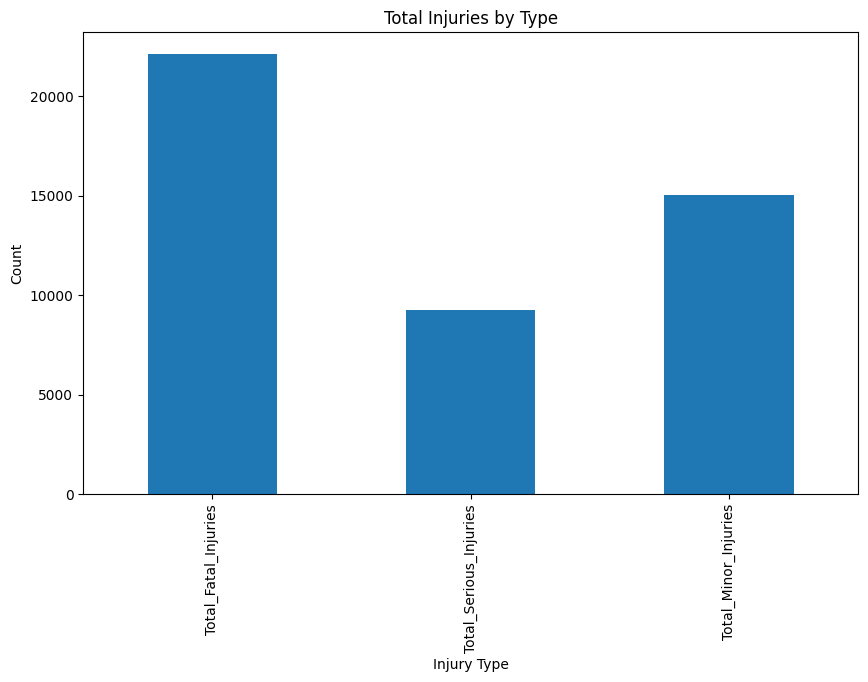

In [36]:
# Total Fatal and Serious Injuries
injury_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries']
aviation_df[injury_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.show()

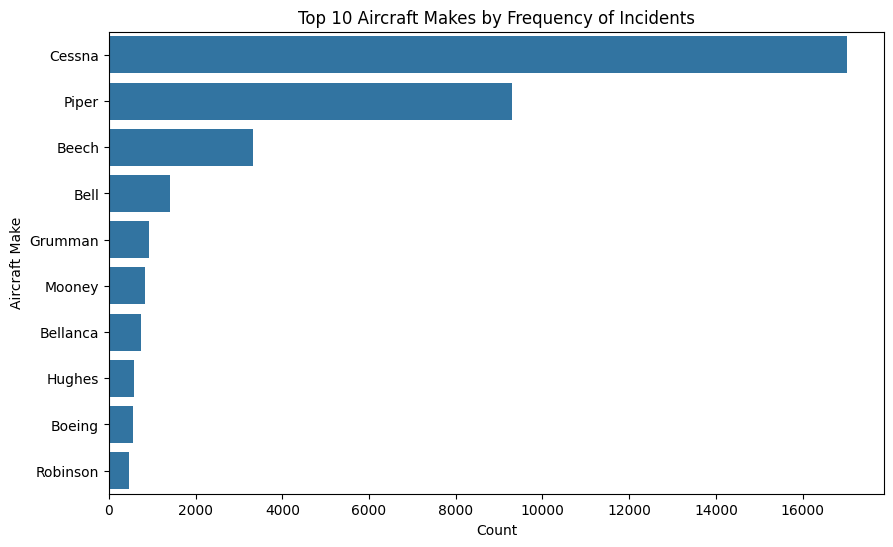

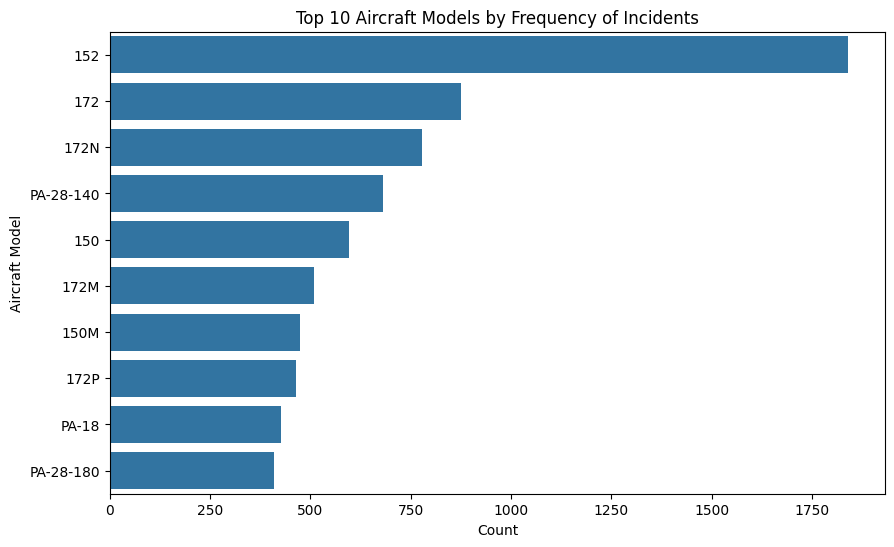

In [37]:
# Most common Aircraft Makes
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, y='Aircraft_Make', order=aviation_df['Aircraft_Make'].value_counts().index[:10])
plt.title('Top 10 Aircraft Makes by Frequency of Incidents')
plt.xlabel('Count')
plt.ylabel('Aircraft Make')
plt.show()

# Most common Aircraft Models
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, y='Aircraft_Model', order=aviation_df['Aircraft_Model'].value_counts().index[:10])
plt.title('Top 10 Aircraft Models by Frequency of Incidents')
plt.xlabel('Count')
plt.ylabel('Aircraft Model')
plt.show()

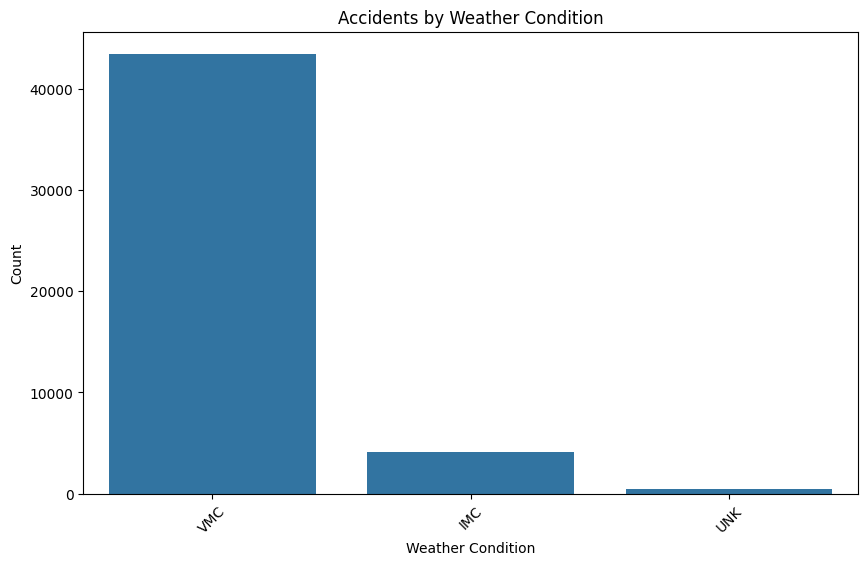

<Figure size 1000x600 with 0 Axes>

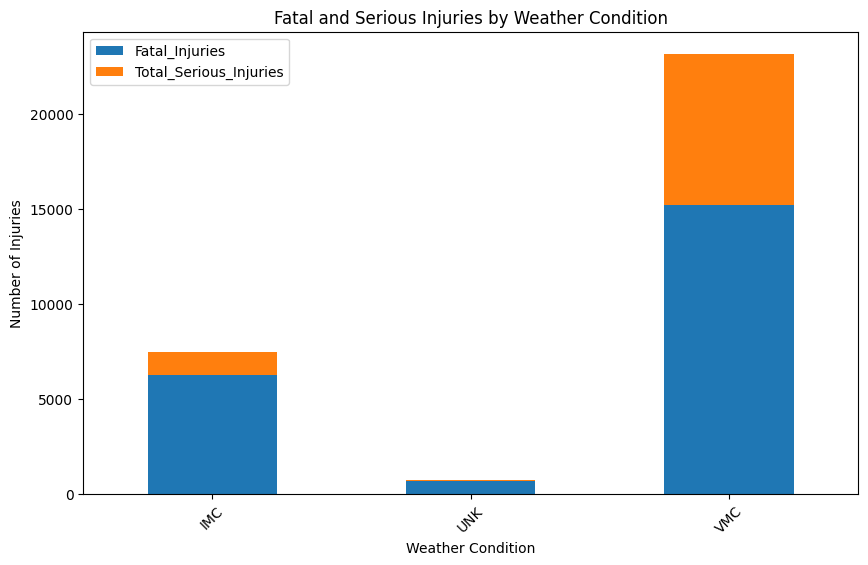

In [38]:
# Count of accidents by Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Weather_Condition', order=aviation_df['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Fatalities and Serious Injuries by Weather Condition
plt.figure(figsize=(10, 6))
weather_injury = aviation_df.groupby('Weather_Condition')[['Fatal_Injuries', 'Total_Serious_Injuries']].sum()
weather_injury.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fatal and Serious Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()


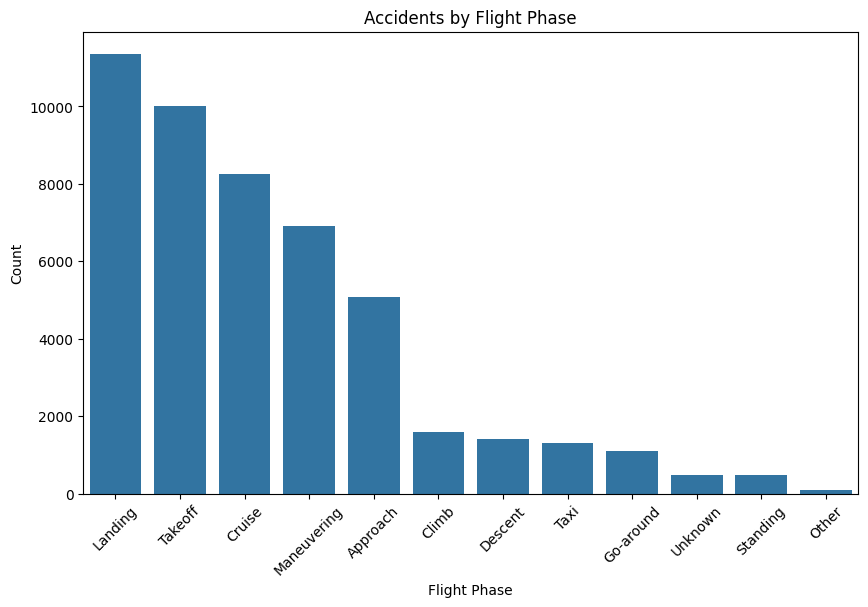

In [39]:
# Accidents by Flight Phase
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Flight_Phase', order=aviation_df['Flight_Phase'].value_counts().index)
plt.title('Accidents by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


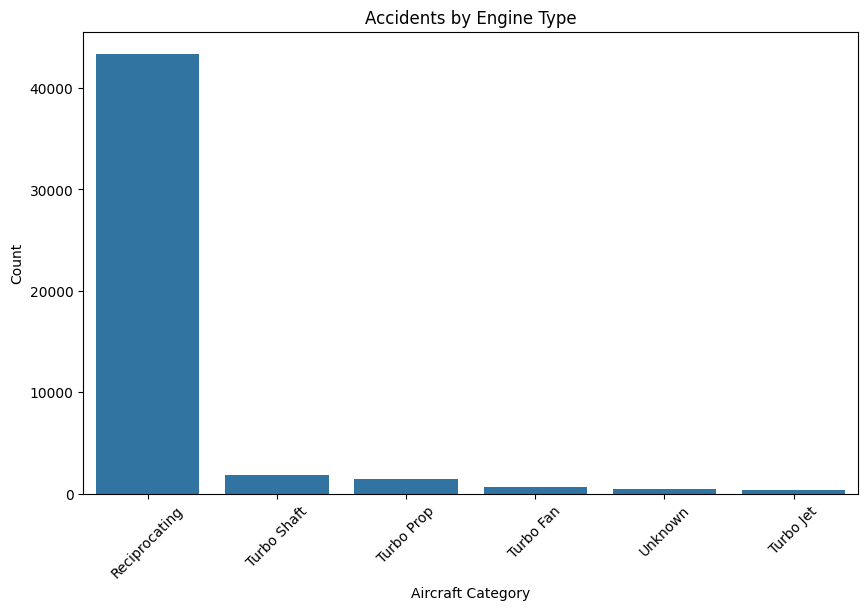

In [40]:
# Accidents by Engine Type
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Engine_Type', order=aviation_df['Engine_Type'].value_counts().index)
plt.title('Accidents by Engine Type')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


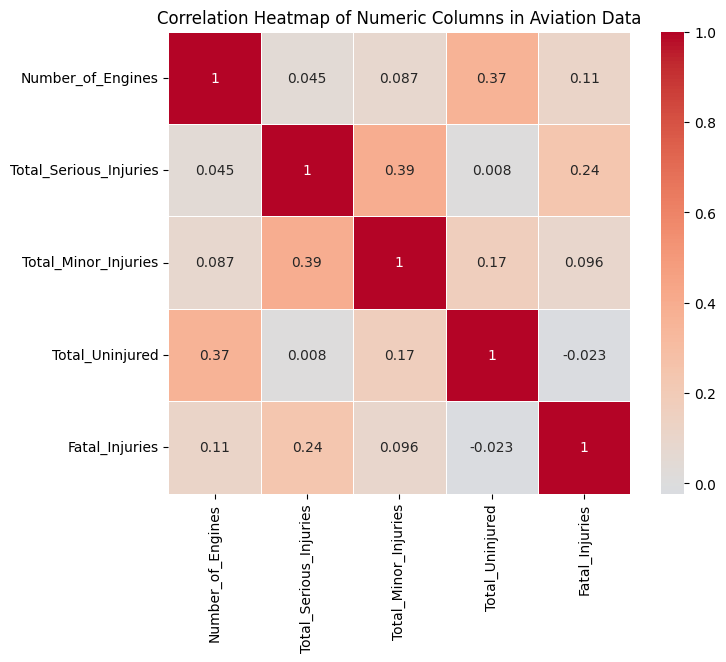

In [41]:
# Select only the numeric columns for the correlation matrix
numeric_columns = ['Number_of_Engines', 'Total_Serious_Injuries', 
                   'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injuries']

# Compute the correlation matrix
corr = aviation_df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with a color bar
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)

# Display the plot
plt.title("Correlation Heatmap of Numeric Columns in Aviation Data")
plt.show()

### Summary of Correlations in Aviation Data

The correlation heatmap reveals mostly weak relationships among variables in the aviation dataset:

- **Number of Engines** has a moderate positive correlation with **Total Uninjured** (0.38), suggesting larger planes with more engines may have more uninjured individuals, potentially due to enhanced safety measures. Its correlation with **Fatal Injuries** is weak (0.1), indicating limited association with fatality rates.
- **Serious Injuries**, **Minor Injuries**, and **Fatal Injuries** show low correlations with each other, implying they are relatively independent outcomes.
- **Total Uninjured** has weak correlations with other injury variables, suggesting that the number of uninjured people doesn’t strongly relate to injury counts in incidents.

Overall, these weak correlations suggest that aviation incident outcomes may be influenced by complex, non-linear factors beyond these variables.


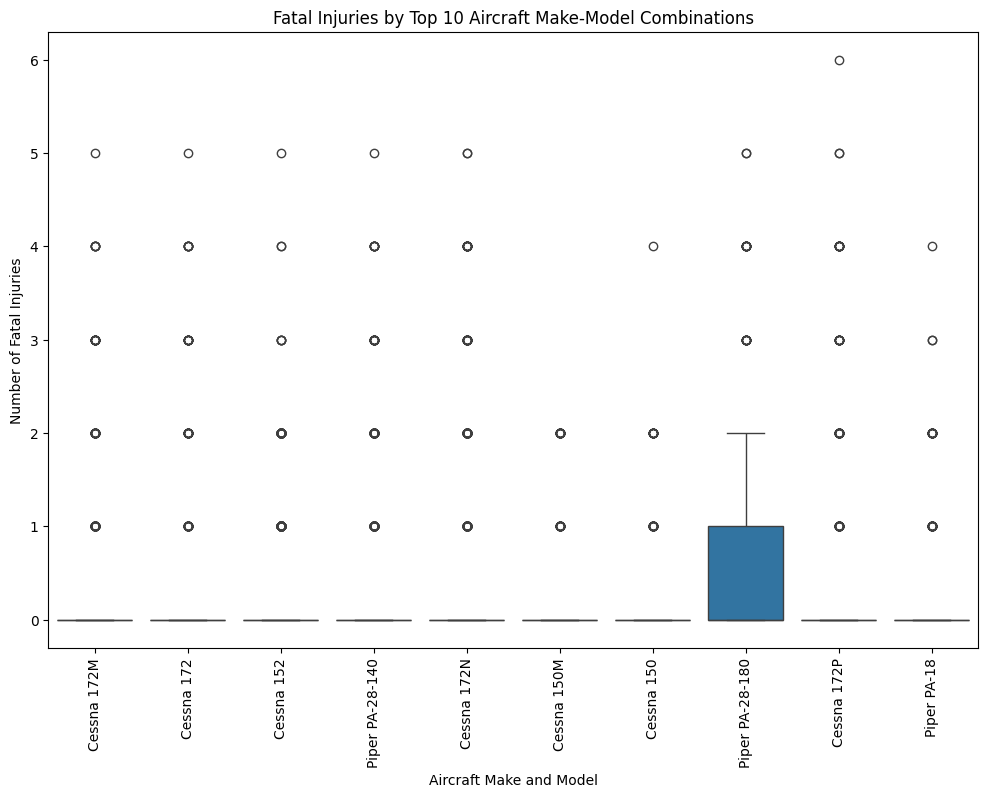

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_aviation_df, x='Make_Model', y='Fatal_Injuries')
plt.xticks(rotation=90)
plt.title('Fatal Injuries by Top 10 Aircraft Make-Model Combinations')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Fatal Injuries')
plt.show()

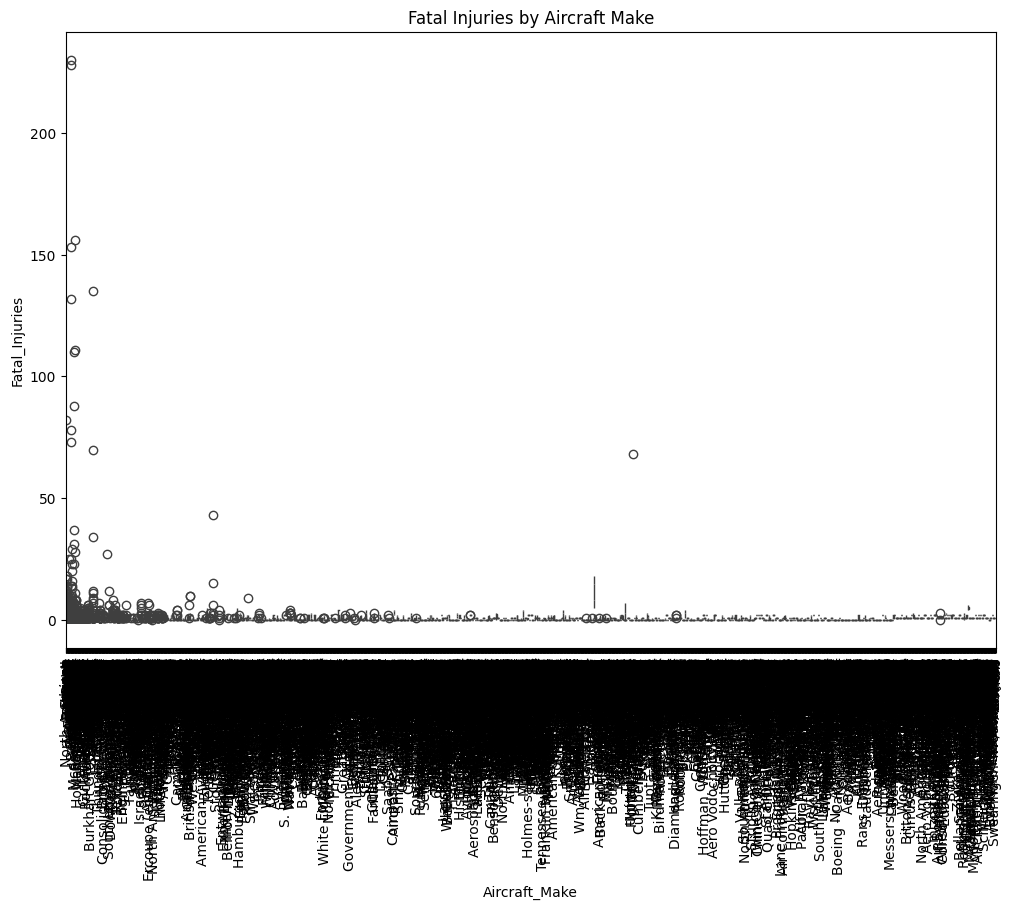

C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
# Example: Analyzing the impact of aircraft make on fatal injuries
plt.figure(figsize=(12, 8))
sns.boxplot(data=aviation_df, x='Aircraft_Make', y='Fatal_Injuries')
plt.xticks(rotation=90)
plt.title('Fatal Injuries by Aircraft Make')
plt.show()

# Similar analysis for Aircraft Model
plt.figure(figsize=(12, 8))
sns.boxplot(data=aviation_df, x='Aircraft_Model', y='Fatal_Injuries')
plt.xticks(rotation=90)
plt.title('Fatal Injuries by Aircraft Model')
plt.show()


In [ ]:
# Serious and Fatal Injuries by Flight Phase
plt.figure(figsize=(10, 6))
flight_phase_injury = aviation_df.groupby('Flight_Phase')[['Fatal_Injuries', 'Total_Serious_Injuries']].sum()
flight_phase_injury.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fatal and Serious Injuries by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Purpose of Flight Impact on Injury Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Purpose_of_Flight', hue='Injury_Severity')
plt.title('Injury Severity by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
aviation_df = aviation_df[(aviation_df['Injury_Severity'] == 'Fatal') | (aviation_df['Injury_Severity'] == 'Non-Fatal')]

# Plot the relationship between Aircraft Damage and Injury Severity
plt.figure(figsize=(12, 8))
sns.countplot(data=aviation_df, x='Aircraft_Damage', hue='Injury_Severity', palette='Set1')

# Set plot title and labels
plt.title('Aircraft Damage and Injury Severity')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Move the legend outside the plot for better readability
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()